In [ ]:
pip install matplotlib

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):
    return 3*x**2 - 4*x + 5
f(3.0)

20.0

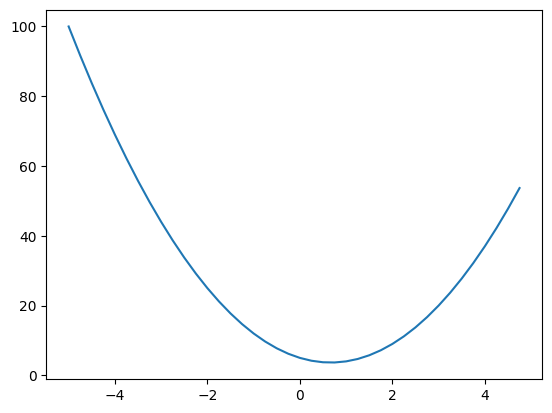

In [9]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [63]:
h = 0.0001
x = 3.0
(f(x+h) - f(x)) / h

14.000300000063248

In [68]:
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

# output
d1 = a * b + c
d2 = (a + h) * b + c
dev_d_a = (d2 - d1) / h
print('d1', d1)
print('d2', d2)
print('dev_d_a', dev_d_a)

d1 4.0
d2 3.9999699999999994
dev_d_a -3.000000000064062


In [80]:
class Value:
    def __init__(self, data, _children=(), _op = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self): # for printing
        return f"Value(data={self.data})"

    def __add__(self, other): # a + b 
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other): # a * b
        return Value(self.data * other.data, (self, other), '*')

In [81]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
print(d._prev)

{Value(data=-6.0), Value(data=10.0)}


In [ ]:
pip install graphviz

In [83]:
from graphviz import Digraph
def trace(root): # using dfs to build a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes: # only add each node once
            nodes.add(v)
            for child in v._prev: # traverse each child only once
                edges.add((child, v)) # from child to parent
                build(child)
    build(root)
    return nodes, edges
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR means left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{%s | data %.4f}" % (n._op, n.data), shape='record')
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)))
    return dot

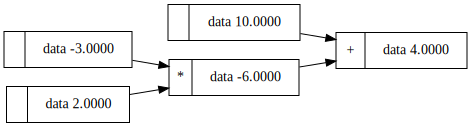

In [84]:
draw_dot(d)

In [85]:
from graphviz import Digraph
def trace(root): # using dfs to build a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes: # only add each node once
            nodes.add(v)
            for child in v._prev: # traverse each child only once
                edges.add((child, v)) # from child to parent
                build(child)
    build(root)
    return nodes, edges
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR means left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{%s | %s | data %.4f}" % (n._op, n.label, n.data), shape='record')
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)))
    return dot

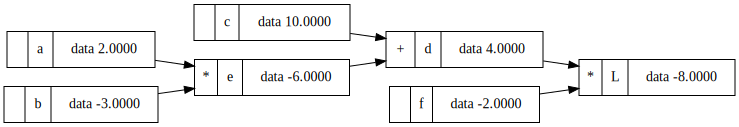

In [88]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # for printing
        return f"Value(data={self.data})"

    def __add__(self, other): # a + b 
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other): # a * b
        return Value(self.data * other.data, (self, other), '*')

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0, label='f')
L = d * f
L.label = 'L'
draw_dot(L)

In [89]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # for printing
        return f"Value(data={self.data})"

    def __add__(self, other): # a + b 
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other): # a * b
        return Value(self.data * other.data, (self, other), '*')

In [90]:
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR means left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{%s | %s | data %.4f | grad %.4f}" % (n._op, n.label, n.data, n.grad), shape='record')
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)))
    return dot

In [91]:
def lol():
    h = 0.00001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data

    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)
lol()

6.000000000128124


In [108]:
from graphviz import Digraph
def trace(root): # using dfs to build a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes: # only add each node once
            nodes.add(v)
            for child in v._prev: # traverse each child only once
                edges.add((child, v)) # from child to parent
                build(child)
    build(root)
    return nodes, edges
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR means left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{%s | %s | data %.4f | grad %.4f}" % (n._op, n.label, n.data, n.grad), shape='record')
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)))
    return dot

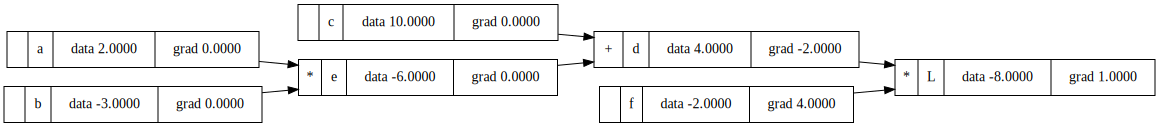

In [109]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # for printing
        return f"Value(data={self.data})"

    def __add__(self, other): # a + b 
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other): # a * b
        return Value(self.data * other.data, (self, other), '*')

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0, label='f')
L = d * f
L.label = 'L'


L.grad = 1.0
f.grad = 4.0 # d.data
d.grad = -2.0 # f.data
draw_dot(L)

In [110]:
c.grad = L.grad * d.grad
e.grad = L.grad * d.grad
print(c.grad)
print(e.grad)

-2.0
-2.0


In [111]:
# de / da = d(a*b) / da = b = -3.0
# de / db = d(a*b) / db = a = 2.0
a.grad = e.grad * -3.0 # (dL/de) * (de/da)
b.grad = e.grad * 2.0
print(a.grad)
print(b.grad)

6.0
-4.0


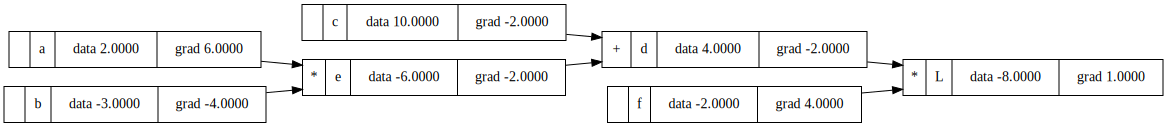

In [112]:
draw_dot(L)

In [113]:
lr = 0.01
a.data += lr * a.grad
b.data += lr * b.grad
c.data += lr * c.grad
f.data += lr * f.grad

e = a * b
d = e + c
L = d * f
print(L.data)

-7.286496
